# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: SANTIAGO ANDRESA ANGULO TORO 1001154362
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

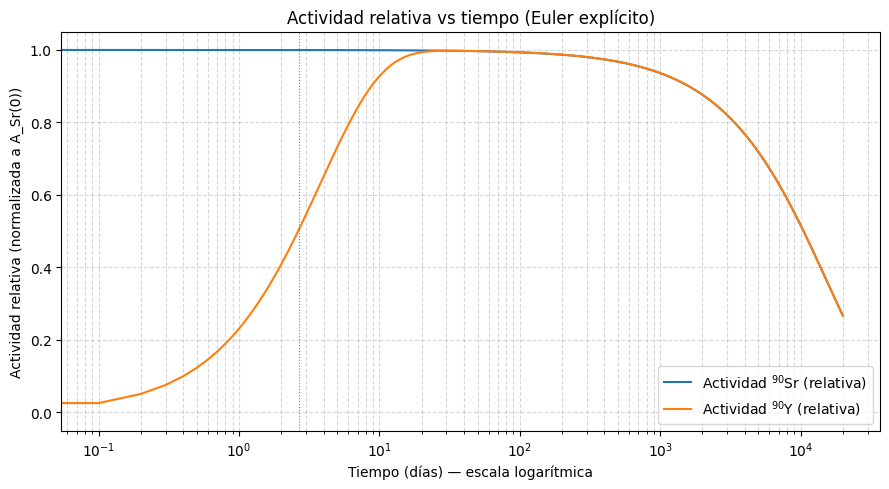

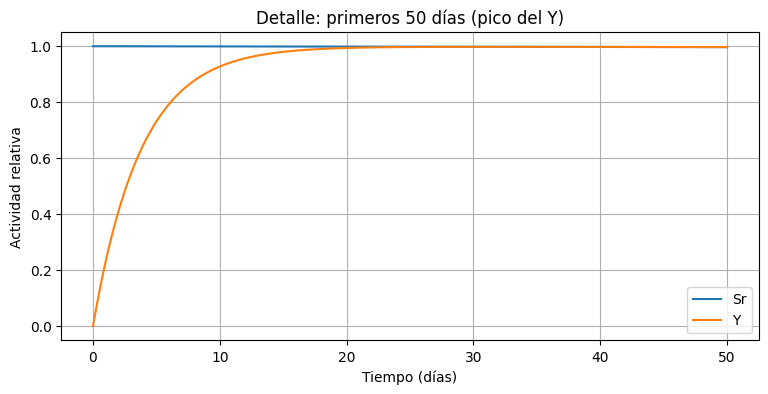

In [6]:

import numpy as np
import matplotlib.pyplot as plt

vida_media_Sr_años = 28.78       # vida media del estroncio en años
vida_media_Y_dias   = 2.67        # vida media del itrio en días

# Conversión de años a días
dias_por_anio = 365.25
vida_media_Sr_dias = vida_media_Sr_años * dias_por_anio

# Constantes de decaimiento (en 1/día)
lambda_Sr = np.log(2) / vida_media_Sr_dias
lambda_Y  = np.log(2) / vida_media_Y_dias

#Condiciones iniciales
N_Sr_inicial = 1.0   # cantidad normalizada de Sr al tiempo 0
N_Y_inicial  = 0.0   # al inicio no hay Y
A_Sr_inicial = lambda_Sr * N_Sr_inicial  # actividad inicial de Sr (para normalizar)

# Dominio de tiempo y paso
tiempo_max_dias = 20000.0   # simulación total en días
dt = 0.1                    # paso en días
num_pasos = int(np.ceil(tiempo_max_dias / dt)) + 1

tiempo = np.linspace(0, tiempo_max_dias, num_pasos)

N_Sr = np.zeros_like(tiempo)
N_Y  = np.zeros_like(tiempo)

N_Sr[0] = N_Sr_inicial
N_Y[0]  = N_Y_inicial

# Iteración con Euler
for i in range(len(tiempo)-1):
    # derivadas en tiempo actual
    dN_Sr_dt = -lambda_Sr * N_Sr[i]
    dN_Y_dt  = -lambda_Y  * N_Y[i] + lambda_Sr * N_Sr[i]

    # paso de Euler
    N_Sr[i+1] = N_Sr[i] + dN_Sr_dt * dt
    N_Y[i+1]  = N_Y[i]  + dN_Y_dt * dt


A_Sr = lambda_Sr * N_Sr
A_Y  = lambda_Y  * N_Y

A_Sr_rel = A_Sr / A_Sr_inicial
A_Y_rel  = A_Y  / A_Sr_inicial

# Gráfica
plt.figure(figsize=(9,5))
plt.plot(tiempo, A_Sr_rel, label=r'Actividad $^{90}$Sr (relativa)')
plt.plot(tiempo, A_Y_rel,  label=r'Actividad $^{90}$Y (relativa)')
plt.xscale('log')
plt.xlabel('Tiempo (días) — escala logarítmica')
plt.ylabel('Actividad relativa (normalizada a A_Sr(0))')
plt.title('Actividad relativa vs tiempo (Euler explícito)')
plt.legend()
plt.grid(which='both', ls='--', alpha=0.5)

# línea auxiliar en vida media del Y
plt.axvline(vida_media_Y_dias, color='gray', linestyle=':', linewidth=0.8,
            label=f'Vida media Y = {vida_media_Y_dias:.2f} días')
plt.tight_layout()
plt.show()

#Gráfica de detalle en tiempos cortos
plt.figure(figsize=(9,4))
mascara_corta = tiempo <= 50  # primeros 50 días
plt.plot(tiempo[mascara_corta], A_Sr_rel[mascara_corta], label='Sr')
plt.plot(tiempo[mascara_corta], A_Y_rel[mascara_corta], label='Y')
plt.xlabel('Tiempo (días)')
plt.ylabel('Actividad relativa')
plt.title('Detalle: primeros 50 días (pico del Y)')
plt.legend()
plt.grid(True)
plt.show()



# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

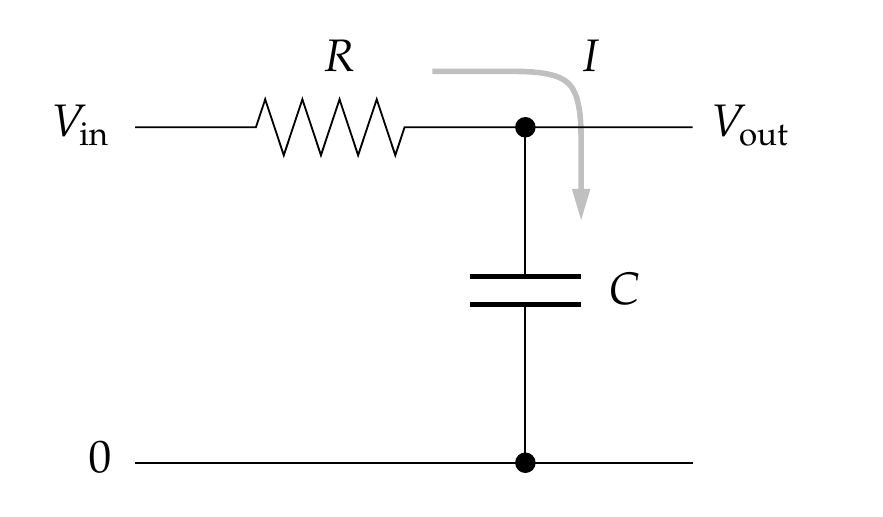

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

In [ ]:
# Aquí va su código

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

Errores relativos (referencia: solución analítica):
  Euler explícito -> error relativo máximo = 1.104e-02, RMSE relativo = 6.050e-03
  RK4            -> error relativo máximo = 1.561e-10, RMSE relativo = 8.669e-11


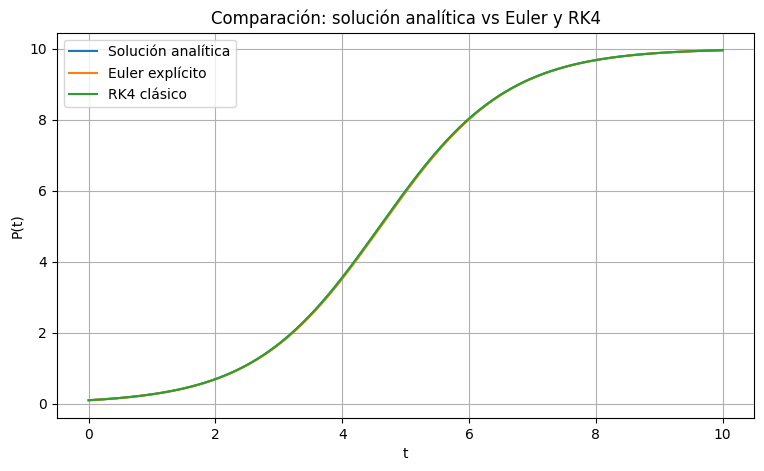

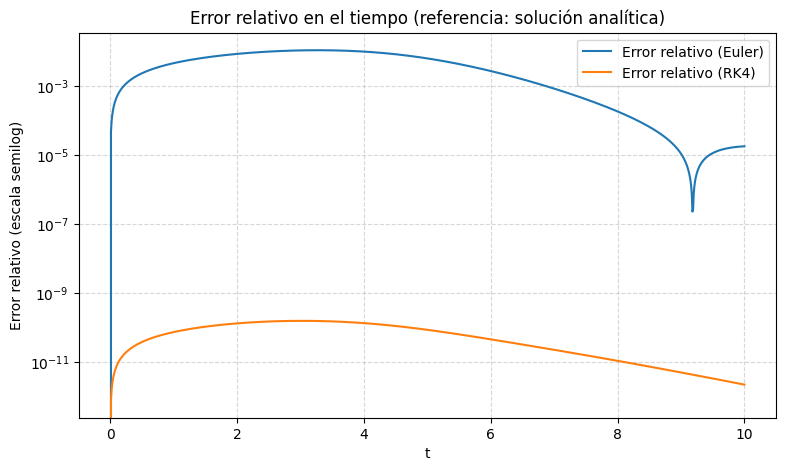

In [8]:
def my_logistic_eq(t, P, r, K):
    """
    Retorna dP/dt para la ecuación logística:
        dP/dt = r * P * (1 - P/K)
    """
    return r * P * (1 - P / K)

# Integrador: Euler explícito
def euler_explicito(fun, t_vec, P0, r, K):
    P = np.zeros_like(t_vec)
    P[0] = P0
    dt = t_vec[1] - t_vec[0]
    for i in range(len(t_vec) - 1):
        dPdt = fun(t_vec[i], P[i], r, K)
        P[i+1] = P[i] + dPdt * dt
    return P

#Integrador: RK4 clásico
def rk4(fun, t_vec, P0, r, K):
    P = np.zeros_like(t_vec)
    P[0] = P0
    dt = t_vec[1] - t_vec[0]
    for i in range(len(t_vec) - 1):
        t_i = t_vec[i]
        y = P[i]
        k1 = fun(t_i,           y,           r, K)
        k2 = fun(t_i + dt/2.0,  y + dt*k1/2.0, r, K)
        k3 = fun(t_i + dt/2.0,  y + dt*k2/2.0, r, K)
        k4 = fun(t_i + dt,      y + dt*k3,     r, K)
        P[i+1] = y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return P

#Solución analítica
def logistic_analitica(t, P0, r, K):
    exp_rt = np.exp(r * t)
    return (K * P0 * exp_rt) / (K + P0 * (exp_rt - 1))

# Parámetros
r = 1.0
K = 10.0
P0 = 0.1

t_max = 10.0
dt = 0.01
t = np.arange(0.0, t_max + dt, dt)


P_euler = euler_explicito(my_logistic_eq, t, P0, r, K)
P_rk4   = rk4(my_logistic_eq, t, P0, r, K)
P_exacto = logistic_analitica(t, P0, r, K)

# Error relativo (punto a punto)
eps = 1e-15
err_rel_euler = np.abs(P_euler - P_exacto) / (np.abs(P_exacto) + eps)
err_rel_rk4   = np.abs(P_rk4   - P_exacto) / (np.abs(P_exacto) + eps)

#resumen
max_err_euler = np.max(err_rel_euler)
rmse_euler = np.sqrt(np.mean(err_rel_euler**2))
max_err_rk4 = np.max(err_rel_rk4)
rmse_rk4 = np.sqrt(np.mean(err_rel_rk4**2))

print("Errores relativos (referencia: solución analítica):")
print(f"  Euler explícito -> error relativo máximo = {max_err_euler:.3e}, RMSE relativo = {rmse_euler:.3e}")
print(f"  RK4            -> error relativo máximo = {max_err_rk4:.3e}, RMSE relativo = {rmse_rk4:.3e}")

# Gráficas
plt.figure(figsize=(9,5))
plt.plot(t, P_exacto, label="Solución analítica")
plt.plot(t, P_euler,  label="Euler explícito")
plt.plot(t, P_rk4,    label="RK4 clásico")
plt.xlabel("t")
plt.ylabel("P(t)")
plt.title("Comparación: solución analítica vs Euler y RK4")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,5))
plt.semilogy(t, err_rel_euler, label="Error relativo (Euler)")
plt.semilogy(t, err_rel_rk4,   label="Error relativo (RK4)")
plt.xlabel("t")
plt.ylabel("Error relativo (escala semilog)")
plt.title("Error relativo en el tiempo (referencia: solución analítica)")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

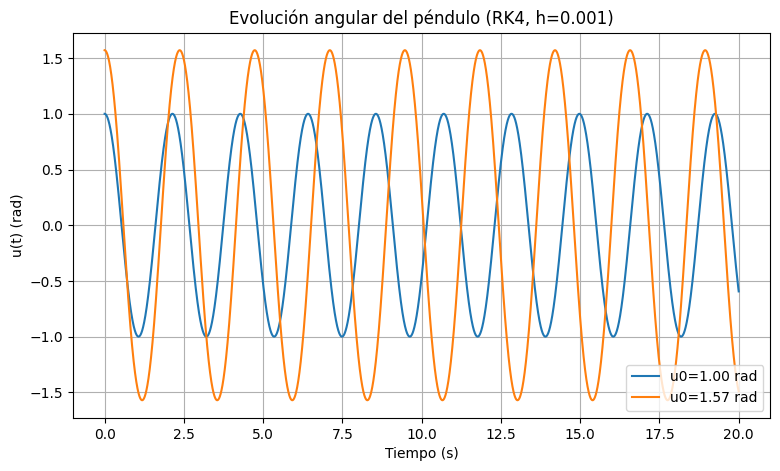

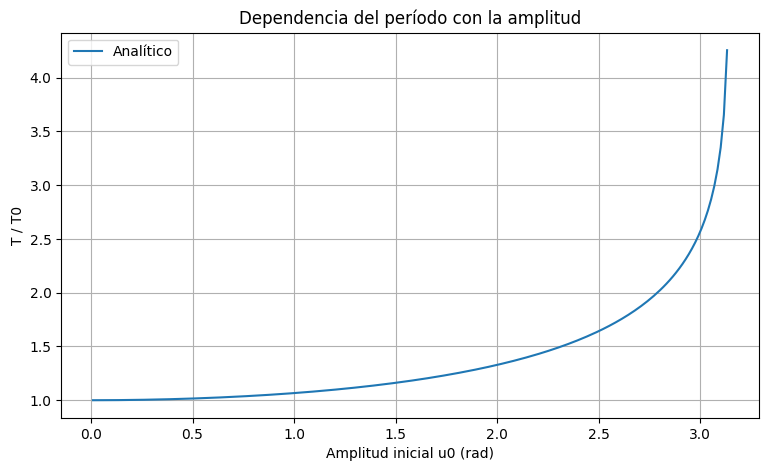

In [10]:
from scipy.special import ellipk

g = 9.81     # gravedad
l = 1.0      # longitud del péndulo (m)
h = 0.001    # paso temporal
t_max = 20   # tiempo de simulación (s)

def f(t, estado):
    u, v = estado  # v = du/dt
    du_dt = v
    dv_dt = -(g/l) * np.sin(u)
    return np.array([du_dt, dv_dt])

# RK4
def rk4_sistema(f, estado0, t0, t_max, h):
    N = int((t_max - t0)/h) + 1
    t = np.linspace(t0, t_max, N)
    sol = np.zeros((N, len(estado0)))
    sol[0] = estado0
    for i in range(N-1):
        k1 = f(t[i], sol[i])
        k2 = f(t[i]+h/2, sol[i] + h*k1/2)
        k3 = f(t[i]+h/2, sol[i] + h*k2/2)
        k4 = f(t[i]+h,   sol[i] + h*k3)
        sol[i+1] = sol[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, sol

# Simulación para u0=1 y u0=pi/2
condiciones_iniciales = [1.0, np.pi/2]
plt.figure(figsize=(9,5))

for u0 in condiciones_iniciales:
    estado0 = [u0, 0.0]  # [u(0), v(0)]
    t, sol = rk4_sistema(f, estado0, 0, t_max, h)
    u = sol[:,0]
    plt.plot(t, u, label=f'u0={u0:.2f} rad')

plt.xlabel("Tiempo (s)")
plt.ylabel("u(t) (rad)")
plt.title("Evolución angular del péndulo (RK4, h=0.001)")
plt.legend()
plt.grid(True)
plt.show()

#Comparación de períodos T/T0
def periodo_analitico(u0):
    T0 = np.sqrt(l/g)
    alpha = np.sin(u0/2)**2
    return T0 * (2/np.pi) * ellipk(alpha)

u0_vals = np.linspace(0.01, np.pi-0.01, 200)
T_analitico = np.array([periodo_analitico(u0) for u0 in u0_vals])
T0 = np.sqrt(l/g)

plt.figure(figsize=(9,5))
plt.plot(u0_vals, T_analitico/T0, label="Analítico")
plt.xlabel("Amplitud inicial u0 (rad)")
plt.ylabel("T / T0")
plt.title("Dependencia del período con la amplitud")
plt.grid(True)
plt.legend()
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

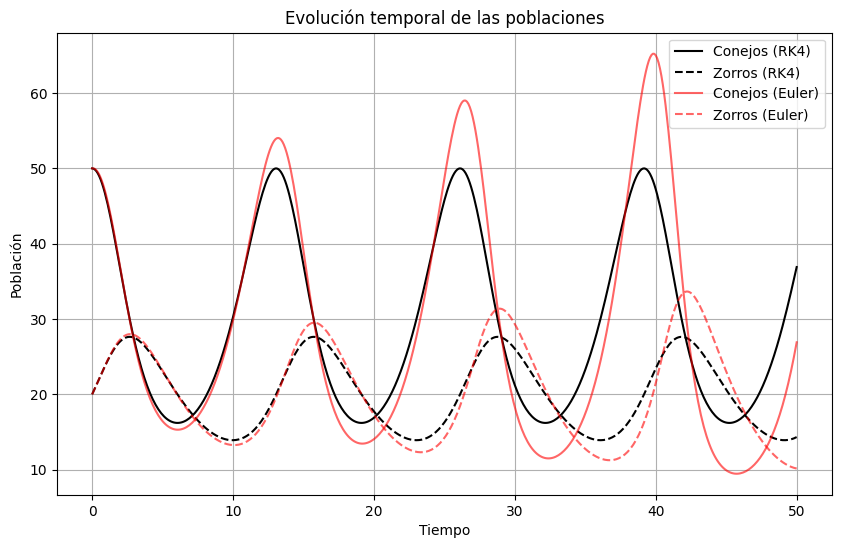

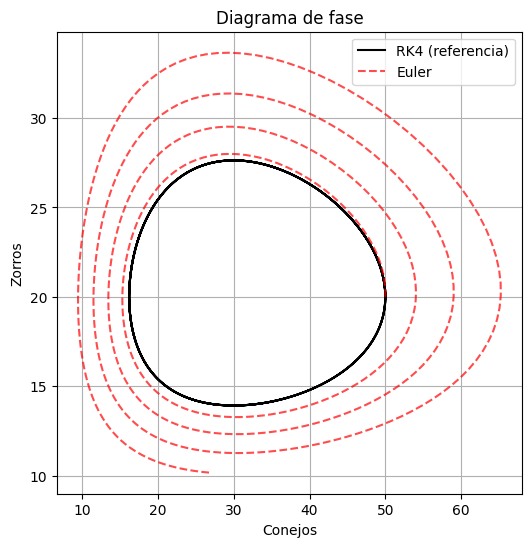

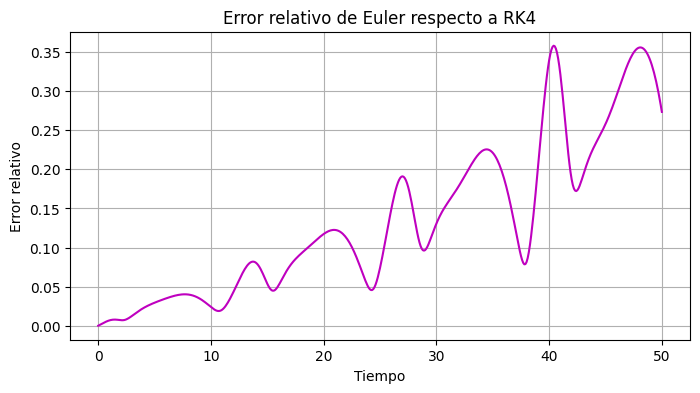

Error relativo máximo (Euler vs RK4): 0.3580688551427573
Error relativo medio (Euler vs RK4): 0.13382021029397906


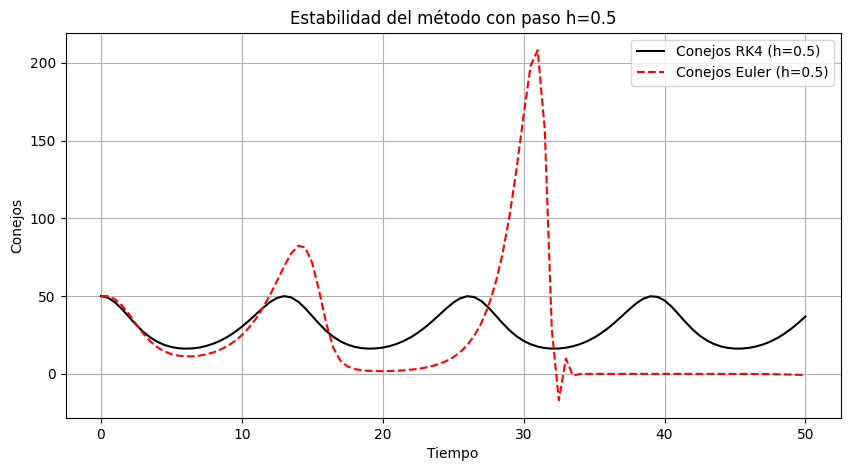

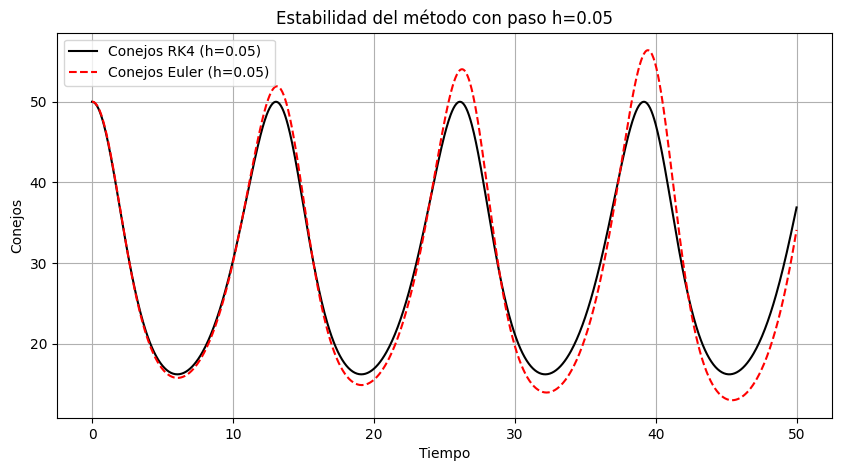

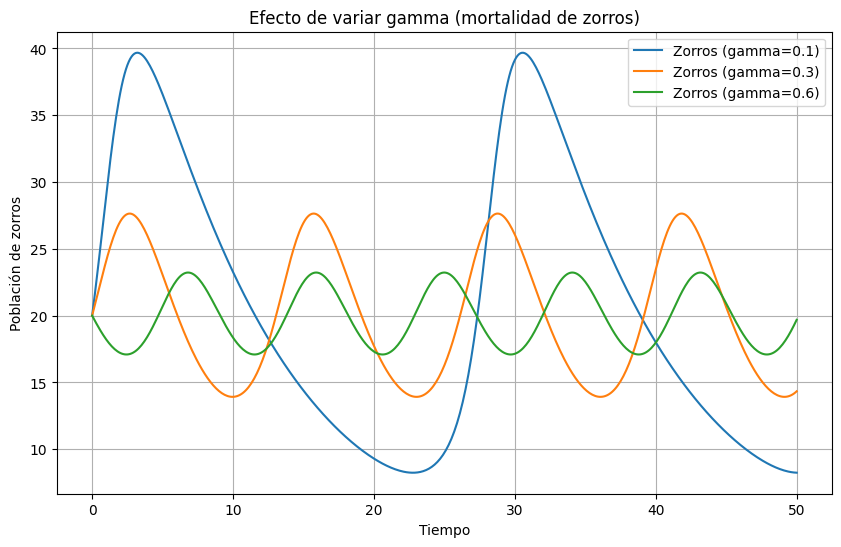

In [14]:
def sistema_lv(t, X, alpha, beta, gamma, delta):
    x, y = X
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return np.array([dxdt, dydt])

# Métodos numéricos
def euler(f, X0, t, h, params):
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(1, len(t)):
        X[i] = X[i-1] + h * f(t[i-1], X[i-1], *params)
    return X

def rk2(f, X0, t, h, params):
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(1, len(t)):
        k1 = f(t[i-1], X[i-1], *params)
        k2 = f(t[i-1] + h/2, X[i-1] + h/2 * k1, *params)
        X[i] = X[i-1] + h * k2
    return X

def rk4(f, X0, t, h, params):
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(1, len(t)):
        k1 = f(t[i-1], X[i-1], *params)
        k2 = f(t[i-1] + h/2, X[i-1] + h/2 * k1, *params)
        k3 = f(t[i-1] + h/2, X[i-1] + h/2 * k2, *params)
        k4 = f(t[i-1] + h, X[i-1] + h * k3, *params)
        X[i] = X[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return X

# Parámetros y condiciones iniciales

alpha, beta, gamma, delta = 0.8, 0.04, 0.3, 0.01
X0 = [50, 20]  # (conejos, zorros)
h = 0.1
t = np.arange(0, 50+h, h)

# Soluciones con distintos métodos

sol_euler = euler(sistema_lv, X0, t, h, (alpha, beta, gamma, delta))
sol_rk2   = rk2(sistema_lv, X0, t, h, (alpha, beta, gamma, delta))
sol_rk4   = rk4(sistema_lv, X0, t, h, (alpha, beta, gamma, delta))

# Gráficas de evolución temporal

plt.figure(figsize=(10,6))
plt.plot(t, sol_rk4[:,0], 'k-', label='Conejos (RK4)')
plt.plot(t, sol_rk4[:,1], 'k--', label='Zorros (RK4)')
plt.plot(t, sol_euler[:,0], 'r-', alpha=0.6, label='Conejos (Euler)')
plt.plot(t, sol_euler[:,1], 'r--', alpha=0.6, label='Zorros (Euler)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución temporal de las poblaciones')
plt.legend()
plt.grid()
plt.show()


# Diagrama de fase (x vs y)
plt.figure(figsize=(6,6))
plt.plot(sol_rk4[:,0], sol_rk4[:,1], 'k-', label='RK4 (referencia)')
plt.plot(sol_euler[:,0], sol_euler[:,1], 'r--', alpha=0.7, label='Euler')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.title('Diagrama de fase')
plt.legend()
plt.grid()
plt.show()

# Error relativo (Euler vs RK4)
error_rel_euler = np.linalg.norm(sol_euler - sol_rk4, axis=1) / np.linalg.norm(sol_rk4, axis=1)

plt.figure(figsize=(8,4))
plt.plot(t, error_rel_euler, 'm-')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.title('Error relativo de Euler respecto a RK4')
plt.grid()
plt.show()

print("Error relativo máximo (Euler vs RK4):", np.max(error_rel_euler))
print("Error relativo medio (Euler vs RK4):", np.mean(error_rel_euler))

# Análisis de estabilidad con diferentes pasos
for h_test in [0.5, 0.05]:
    t_test = np.arange(0, 50+h_test, h_test)
    sol_euler_test = euler(sistema_lv, X0, t_test, h_test, (alpha, beta, gamma, delta))
    sol_rk4_test   = rk4(sistema_lv, X0, t_test, h_test, (alpha, beta, gamma, delta))

    plt.figure(figsize=(10,5))
    plt.plot(t_test, sol_rk4_test[:,0], 'k-', label=f'Conejos RK4 (h={h_test})')
    plt.plot(t_test, sol_euler_test[:,0], 'r--', label=f'Conejos Euler (h={h_test})')
    plt.xlabel('Tiempo')
    plt.ylabel('Conejos')
    plt.title(f'Estabilidad del método con paso h={h_test}')
    plt.legend()
    plt.grid()
    plt.show()

# Variación de parámetros

valores_gamma = [0.1, 0.3, 0.6]

plt.figure(figsize=(10,6))
for g in valores_gamma:
    sol_temp = rk4(sistema_lv, X0, t, h, (alpha, beta, g, delta))
    plt.plot(t, sol_temp[:,1], label=f'Zorros (gamma={g})')

plt.xlabel('Tiempo')
plt.ylabel('Población de zorros')
plt.title('Efecto de variar gamma (mortalidad de zorros)')
plt.legend()
plt.grid()
plt.show()


# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


<>:55: SyntaxWarning: invalid escape sequence '\g'
<>:68: SyntaxWarning: invalid escape sequence '\g'
<>:87: SyntaxWarning: invalid escape sequence '\o'
<>:100: SyntaxWarning: invalid escape sequence '\o'
<>:55: SyntaxWarning: invalid escape sequence '\g'
<>:68: SyntaxWarning: invalid escape sequence '\g'
<>:87: SyntaxWarning: invalid escape sequence '\o'
<>:100: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-116222698.py:55: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(t, x, label=f"$x(t), \gamma={gamma}$")
/tmp/ipython-input-116222698.py:68: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(t, E, label=f"$E(t), \gamma={gamma}$")
/tmp/ipython-input-116222698.py:87: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, x, label=f"$x(t), \omega={round(omega,2)}$")
/tmp/ipython-input-116222698.py:100: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, E, label=f"$E(t), \omega={round(omega,2)}$")


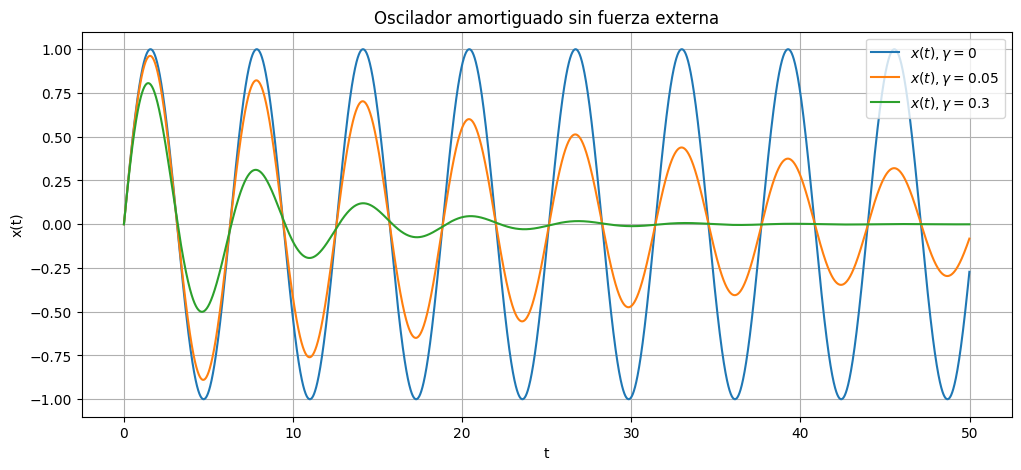

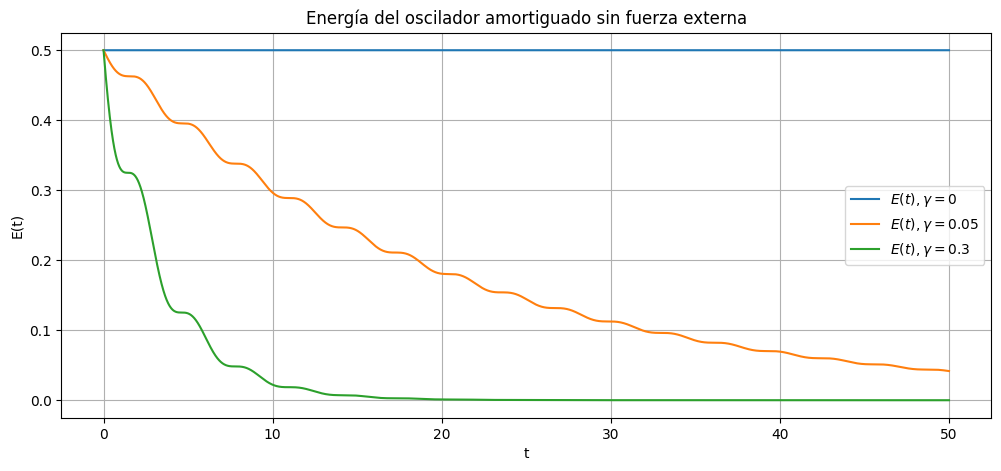

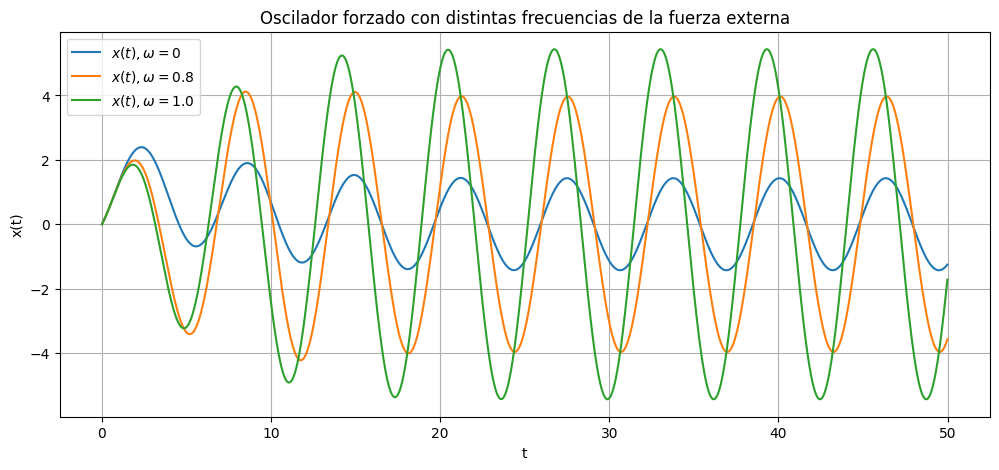

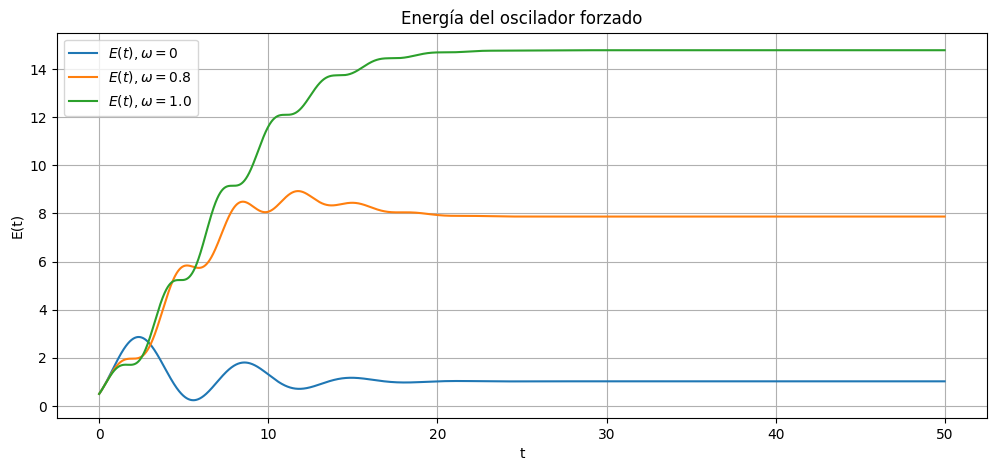

In [16]:
m = 1.0         # masa (kg)
k = 1.0         # constante del resorte
w0 = np.sqrt(k/m)  # frecuencia natural

x0 = 0.0
v0 = 1.0

t0, tf, h = 0, 50, 0.01
t = np.arange(t0, tf, h)

#  Definimos sistema
def forzado(t, F_type, gamma, omega=0, F0=0, T=10):
    """
    Devuelve la fuerza en función del tiempo para cada caso.
    """
    if F_type == "none":  # sin fuerza externa
        return 0
    elif F_type == "cos":  # fuerza coseno modulada gaussiana
        return F0 * np.cos(omega*t) * np.exp(-(t**2)/(T**2))
    else:
        raise ValueError("Tipo de fuerza no reconocido")

def sistema(t, X, gamma, F_type="none", omega=0, F0=0, T=10):

    x, v = X
    dxdt = v
    dvdt = (forzado(t, F_type, gamma, omega, F0, T)/m) - gamma*v - (w0**2)*x
    return np.array([dxdt, dvdt])

# Método RK4
def rk4(f, X0, t, gamma, F_type="none", omega=0, F0=0, T=10):
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], X[i-1], gamma, F_type, omega, F0, T)
        k2 = f(t[i-1] + h/2, X[i-1] + h*k1/2, gamma, F_type, omega, F0, T)
        k3 = f(t[i-1] + h/2, X[i-1] + h*k2/2, gamma, F_type, omega, F0, T)
        k4 = f(t[i-1] + h, X[i-1] + h*k3, gamma, F_type, omega, F0, T)
        X[i] = X[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return X

def energia(x, v):
    return 0.5*m*v**2 + 0.5*k*x**2

# (1) CASO: F=0, con distintos gammas
gammas = [0, 0.05, 0.3]

plt.figure(figsize=(12,5))

for gamma in gammas:
    sol = rk4(sistema, [x0, v0], t, gamma, F_type="none")
    x, v = sol[:,0], sol[:,1]
    E = energia(x,v)
    plt.plot(t, x, label=f"$x(t), \gamma={gamma}$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Oscilador amortiguado sin fuerza externa")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
for gamma in gammas:
    sol = rk4(sistema, [x0, v0], t, gamma, F_type="none")
    x, v = sol[:,0], sol[:,1]
    E = energia(x,v)
    plt.plot(t, E, label=f"$E(t), \gamma={gamma}$")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.title("Energía del oscilador amortiguado sin fuerza externa")
plt.legend()
plt.grid()
plt.show()

# (2) CASO: gamma=0, con fuerza externa F=F0 cos(wt) exp(-t^2/T^2)

gamma = 0.0
F0 = 1.0
T0 = 10.0
omegas = [0, 0.8*w0, w0]

plt.figure(figsize=(12,5))
for omega in omegas:
    sol = rk4(sistema, [x0, v0], t, gamma, F_type="cos", omega=omega, F0=F0, T=T0)
    x, v = sol[:,0], sol[:,1]
    plt.plot(t, x, label=f"$x(t), \omega={round(omega,2)}$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Oscilador forzado con distintas frecuencias de la fuerza externa")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
for omega in omegas:
    sol = rk4(sistema, [x0, v0], t, gamma, F_type="cos", omega=omega, F0=F0, T=T0)
    x, v = sol[:,0], sol[:,1]
    E = energia(x,v)
    plt.plot(t, E, label=f"$E(t), \omega={round(omega,2)}$")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.title("Energía del oscilador forzado")
plt.legend()
plt.grid()
plt.show()



# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

Valor crítico encontrado numéricamente: mu_c ≈ 0.50000
Criterio de Routh: mu_c ≈ 0.03852
μ (Sol-Tierra) = 3.002991e-06
μ (Sol-Júpiter) = 9.535898e-04

Valores propios Sol-Tierra (L4):
[ 2.08166817e-16+2.31781746j  2.08166817e-16-2.31781746j
  6.10145716e-01+0.j         -6.10145716e-01+0.j        ]
Inestable

Valores propios Sol-Júpiter (L4):
[ 1.94289029e-16+2.31757668j  1.94289029e-16-2.31757668j
  6.09230402e-01+0.j         -6.09230402e-01+0.j        ]
Inestable


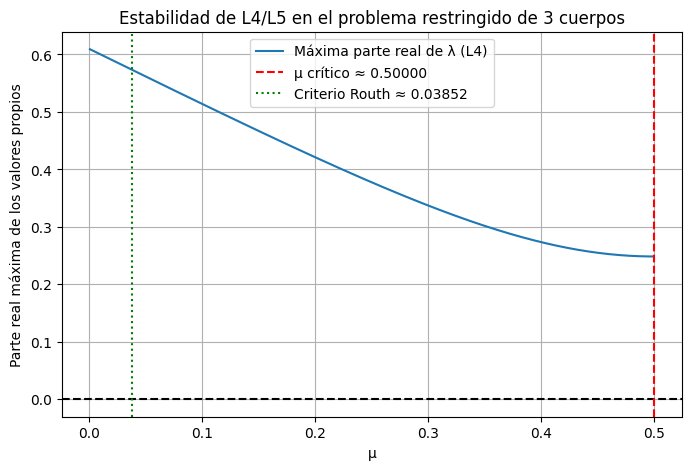

In [18]:
from numpy.linalg import eig

def Uxx(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return (1 - mu) * (3 * (x + mu)**2 / r1**5 - 1 / r1**3) + \
           mu * (3 * (x - 1 + mu)**2 / r2**5 - 1 / r2**3) - 1

def Uyy(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return (1 - mu) * (3 * y**2 / r1**5 - 1 / r1**3) + \
           mu * (3 * y**2 / r2**5 - 1 / r2**3) - 1

def Uxy(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    return (1 - mu) * (3 * (x + mu) * y / r1**5) + \
           mu * (3 * (x - 1 + mu) * y / r2**5)


# 2. Matriz A en L4 o L5

def matriz_A(mu, punto="L4"):
    if punto == "L4":
        xL, yL = 0.5 - mu, np.sqrt(3)/2
    else:  # L5
        xL, yL = 0.5 - mu, -np.sqrt(3)/2

    a = Uxx(xL, yL, mu)
    d = Uyy(xL, yL, mu)
    b = Uxy(xL, yL, mu)
    c = b  # simetría
    omega = 1.0

    A = np.array([
        [0,     1,     0,     0],
        [a,     0,     b,  2*omega],
        [0,     0,     0,     1],
        [c, -2*omega,  d,     0]
    ])
    return A


# 3. Análisis de estabilidad

def analizar_estabilidad(mu, punto="L4"):
    A = matriz_A(mu, punto)
    valores, _ = eig(A)
    return valores

# 4. Barrido en mu

mus = np.linspace(0.001, 0.5, 500)
real_parts = []

for mu in mus:
    vals = analizar_estabilidad(mu, "L4")
    real_parts.append(np.max(np.real(vals)))

real_parts = np.array(real_parts)

# Encuentro el valor crítico donde la parte real cruza 0
idx = np.argmin(np.abs(real_parts))
mu_critico = mus[idx]

print(f"Valor crítico encontrado numéricamente: mu_c ≈ {mu_critico:.5f}")
print("Criterio de Routh: mu_c ≈ 0.03852")

# 5. Casos reales: Sol-Tierra y Sol-Júpiter

M_sun = 1.0  # masa solar en unidades normalizadas
M_earth = 3.003e-6
M_jupiter = 9.545e-4

mu_earth = M_earth / (M_sun + M_earth)
mu_jupiter = M_jupiter / (M_sun + M_jupiter)

print(f"μ (Sol-Tierra) = {mu_earth:.6e}")
print(f"μ (Sol-Júpiter) = {mu_jupiter:.6e}")

eig_earth = analizar_estabilidad(mu_earth, "L4")
eig_jup = analizar_estabilidad(mu_jupiter, "L4")

print("\nValores propios Sol-Tierra (L4):")
print(eig_earth)
print("Estable" if np.all(np.real(eig_earth) <= 0) else "Inestable")

print("\nValores propios Sol-Júpiter (L4):")
print(eig_jup)
print("Estable" if np.all(np.real(eig_jup) <= 0) else "Inestable")

# 6. Gráfico de estabilidad

plt.figure(figsize=(8,5))
plt.axhline(0, color="black", linestyle="--")
plt.plot(mus, real_parts, label="Máxima parte real de λ (L4)")
plt.axvline(mu_critico, color="red", linestyle="--", label=f"μ crítico ≈ {mu_critico:.5f}")
plt.axvline(0.03852, color="green", linestyle=":", label="Criterio Routh ≈ 0.03852")
plt.xlabel("μ")
plt.ylabel("Parte real máxima de los valores propios")
plt.title("Estabilidad de L4/L5 en el problema restringido de 3 cuerpos")
plt.legend()
plt.grid(True)
plt.show()


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


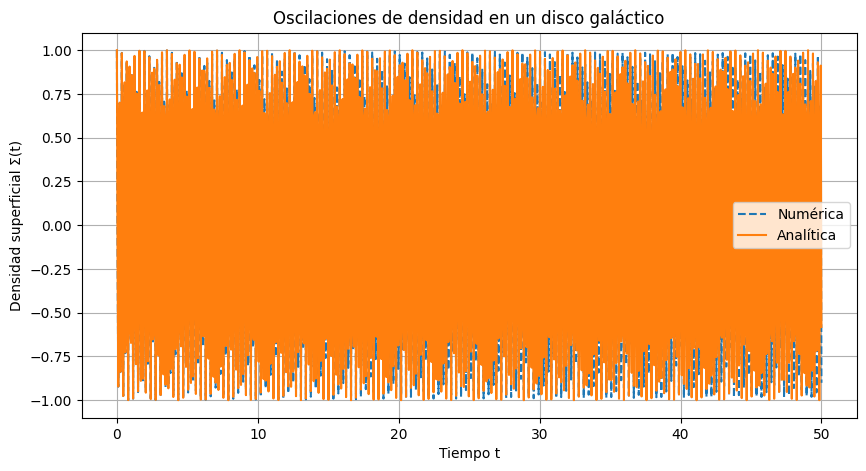

Matriz del sistema:
 [[ 0.00e+00  1.00e+00]
 [-1.25e+03  0.00e+00]]
Valores propios: [0.+35.35533906j 0.-35.35533906j]


In [21]:
from scipy.integrate import solve_ivp

V0 = 200  # km/s, velocidad de rotación constante
radio = 8.0   # kpc, radio considerado
kappa = np.sqrt(2) * V0 / radio  # frecuencia de epicíclo

Sigma0 = 1.0       # densidad inicial
Sigma_punto0 = 0.0 # derivada inicial

def sistema(t, y):
    sigma, sigma_punto = y
    dsigmadt = sigma_punto
    dsigma_puntodt = -kappa**2 * sigma
    return [dsigmadt, dsigma_puntodt]

tiempo_intervalo = (0, 50)  # unidades consistentes
tiempo_eval = np.linspace(tiempo_intervalo[0], tiempo_intervalo[1], 1000)

# Solución numérica
sol = solve_ivp(sistema, tiempo_intervalo, [Sigma0, Sigma_punto0], t_eval=tiempo_eval)

# Solución analítica
Sigma_analitica = Sigma0 * np.cos(kappa * tiempo_eval) + (Sigma_punto0 / kappa) * np.sin(kappa * tiempo_eval)

# Grafica
plt.figure(figsize=(10,5))
plt.plot(tiempo_eval, sol.y[0], label='Numérica', linestyle='--')
plt.plot(tiempo_eval, Sigma_analitica, label='Analítica', linestyle='-')
plt.xlabel('Tiempo t')
plt.ylabel('Densidad superficial Σ(t)')
plt.title('Oscilaciones de densidad en un disco galáctico')
plt.legend()
plt.grid(True)
plt.show()

# Matriz del sistema y valores propios
Matriz_sistema = np.array([[0, 1], [-kappa**2, 0]])
valores_propios = np.linalg.eigvals(Matriz_sistema)
print("Matriz del sistema:\n", Matriz_sistema)
print("Valores propios:", valores_propios)



# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

In [ ]:
#Aquí va su código